# Laboratorium 1: Wprowadzenie do równań różniczkowych

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import integrate
import sympy
from ipywidgets import interact
import ipywidgets as widgets

In [2]:
sympy.init_printing()

## Obliczenia symboliczne i obliczanie pochodnych

In [3]:
x, y = sympy.symbols('x, y')
expr = sympy.expand((x + y)**2)
expr

In [4]:
expr = (x + y)**3
expr

In [5]:
sympy.expand(expr)

In [6]:
sympy.diff(expr, x)

In [7]:
expr = sympy.expand((x + y)**2)
sympy.diff(expr, x)

In [8]:
sympy.diff(sympy.exp(x * y), x, x)

In [9]:
sympy.diff(sympy.exp(x * y), x, 2)

In [10]:
sympy.exp(x * y).diff(x)

In [11]:
sympy.exp(x * y).diff(x * y)

ValueError: 
Can't calculate derivative wrt x*y.

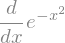

In [12]:
deriv = sympy.Derivative(sympy.exp(- x**2), x)
deriv

In [13]:
deriv.doit()

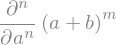

In [16]:
n, a, b = sympy.symbols('n, a, b')
m = sympy.symbols('m', positive=True)
expr = (a + b)**m
expr.diff((a, n))

Analogiczna składnia obowiązuje przy całkowaniu - `integrate`, `Integral`

In [17]:
t, k, T0, Ta = sympy.symbols('t, k, T_0, T_a')
T = sympy.Function('T')
expr = T(t).diff(t) + k * (T(t) - Ta)

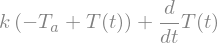

In [18]:
expr

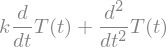

In [19]:
expr.diff(t)

C:\ProgramData\Anaconda3\lib\site-packages\sympy\core\relational.py:470: SymPyDeprecationWarning: 

Eq(expr) with rhs default to 0 has been deprecated since SymPy 1.5.
Use Eq(expr, 0) instead. See
https://github.com/sympy/sympy/issues/16587 for more info.

  deprecated_since_version="1.5"


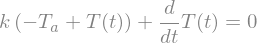

In [20]:
sympy.Eq(expr)

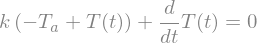

In [21]:
sympy.Eq(expr, 0)

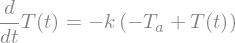

In [22]:
sympy.Eq(T(t).diff(t), - k * (T(t) - Ta))

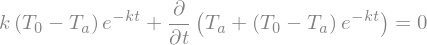

In [23]:
Tsol = Ta + (T0 - Ta) * sympy.exp(- k * t)
sympy.Eq(expr, 0).subs(T(t), Tsol)

In [24]:
sympy.Eq(expr, 0).subs(T(t), Tsol).doit()

In [25]:
sympy.Eq(Tsol.diff(t) + k * (Tsol - Ta), 0)

In [26]:
sympy.checkodesol(expr, Tsol)

(True, 0)

## Równanie różniczkowe - rozwiązania analityczne

In [29]:
ode = T(t).diff(t) + k * (T(t) - Ta)
ode_sol = sympy.dsolve(sympy.Eq(ode, 0))
ode_sol

In [30]:
sympy.classify_ode(ode, T(t))

('separable',
 '1st_linear',
 'Bernoulli',
 'almost_linear',
 '1st_power_series',
 'lie_group',
 'nth_linear_constant_coeff_undetermined_coefficients',
 'nth_linear_constant_coeff_variation_of_parameters',
 'separable_Integral',
 '1st_linear_Integral',
 'Bernoulli_Integral',
 'almost_linear_Integral',
 'nth_linear_constant_coeff_variation_of_parameters_Integral')

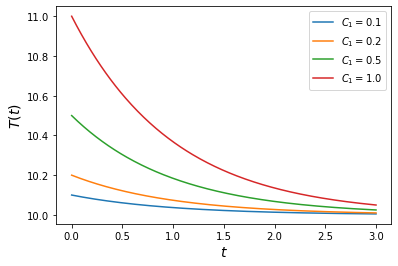

In [31]:
tt = np.linspace(0, 3, 250)
for C1 in [0.1, 0.2, 0.5, 1.0]:
    T_t = sympy.lambdify(t, ode_sol.rhs.subs({k: 1, Ta: 10, 'C1': C1}), 'numpy')
    plt.plot(tt, T_t(tt), label=r"$C_1 = %.1f$" % C1)
plt.xlabel('$t$', fontsize=14)
plt.ylabel('$T(t)$', fontsize=14)
plt.legend()
plt.show()

In [32]:
ivp_sol = sympy.dsolve(ode, T(t), ics={T(0): T0})
ivp_sol

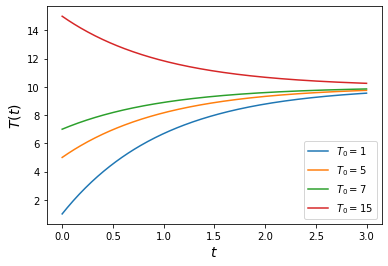

In [33]:
for t0 in [1, 5, 7, 15]:
    T_t = sympy.lambdify(t, ivp_sol.rhs.subs({k: 1, Ta: 10, T0: t0}), 'numpy')
    plt.plot(tt, T_t(tt), label=r"$T_0 = %.0f$" % t0)
plt.xlabel("$t$", fontsize=14)
plt.ylabel("$T(t)$", fontsize=14)
plt.legend()
plt.show()

$$x''(t) + 2px'(t) + \omega_0^2 x(t) = 0$$

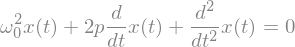

In [35]:
t, omega0, p = sympy.symbols('t, omega_0, p', positive=True)
x = sympy.Function('x')
ode = x(t).diff(t, 2) + 2 * p * x(t).diff(t) + omega0**2 * x(t)
sympy.Eq(ode, 0)

In [36]:
ode_sol = sympy.dsolve(ode, x(t))
ode_sol

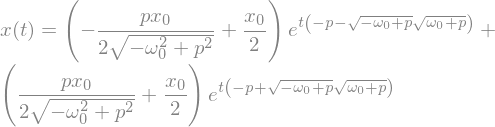

In [37]:
x0 = sympy.symbols('x_0')
ivp_sol = sympy.dsolve(ode, x(t), ics={x(0): x0, x(t).diff(t).subs(t, 0): 0})
ivp_sol

In [38]:
ivp_sol_crit = sympy.limit(ivp_sol.rhs, p, omega0)
ivp_sol_crit

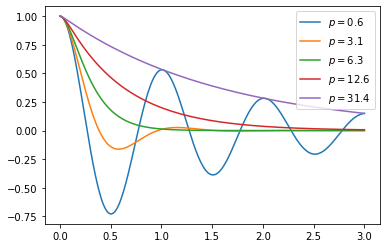

In [39]:
tt = np.linspace(0, 3, 250)
w0 = 2 * sympy.pi
for p0 in [0.1 * w0, 0.5 * w0, w0, 2.0 * w0, 5.0 * w0]:
    if p0 == w0:
        x_t = sympy.lambdify(t, ivp_sol_crit.subs({omega0: w0, x0: 1}), 'numpy')
    else:
        x_t = sympy.lambdify(t, ivp_sol.rhs.subs({omega0: w0, p: p0, x0: 1}), 'numpy')
    plt.plot(tt, x_t(tt).real, label=r"$p = %.1f$" % p0)
plt.legend()
plt.show()

Problemy:

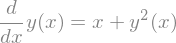

In [41]:
x = sympy.symbols('x')
y = sympy.Function('y')
f = y(x)**2 + x
sympy.Eq(y(x).diff(x), f)

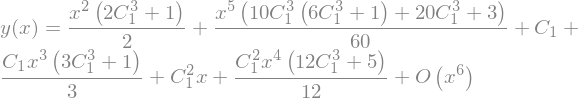

In [42]:
sympy.dsolve(y(x).diff(x) - f, y(x))

In [43]:
sympy.classify_ode(y(x).diff(x) - f, y(x))

('1st_power_series', 'lie_group')

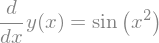

In [44]:
f = sympy.sin(x**2)
sympy.Eq(y(x).diff(x), f)

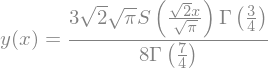

In [45]:
sympy.dsolve(y(x).diff(x) - f, y(x), ics={y(0): 0})

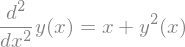

In [46]:
f = y(x)**2 + x
sympy.Eq(y(x).diff(x, x), f)

In [47]:
sympy.dsolve(y(x).diff(x, x) - f, y(x))

NotImplementedError: solve: Cannot solve -x - y(x)**2 + Derivative(y(x), (x, 2))

$$x'(t) = \frac{1}{p}y(t) - d, \quad x(0) = x_0,$$
$$y'(t) = -\frac{1}{p}y(t) + d + k(s - x(t)), \quad y(0) = y_0.$$

In [48]:
t = sympy.symbols('t')
s, d, k, p = 4, 3, 1.5, 4
x = sympy.Function('x')
y = sympy.Function('y')
f1 = y(t) / p - d
f2 = - y(t) / p + d + k * (s - x(t))

In [49]:
ode_sol = sympy.dsolve([x(t).diff(t) - f1, y(t).diff(t) - f2], ics={x(0): 8, y(0): 14})

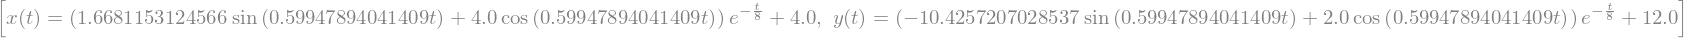

In [50]:
ode_sol

In [51]:
def przyklad(s, d, k, p, x0, y0):
    t = sympy.symbols('t')
    x = sympy.Function('x')
    y = sympy.Function('y')
    f1 = y(t) / p - d
    f2 = - y(t) / p + d + k * (s - x(t))
    ode_sol = sympy.dsolve([x(t).diff(t) - f1, y(t).diff(t) - f2], ics={x(0): x0, y(0): y0})
    
    tt = np.linspace(0, 50, 200)
    x_t = sympy.lambdify(t, ode_sol[0].rhs, 'numpy')
    y_t = sympy.lambdify(t, ode_sol[1].rhs, 'numpy')
    plt.plot(tt, x_t(tt), label="$x(t)$")
    plt.plot(tt, y_t(tt), label="$y(t)$")
    plt.legend()
    plt.show()
    
interact(przyklad, s=widgets.IntSlider(min=1, max=100, step=1, value=4, description="s"),
                   d=widgets.IntSlider(min=0, max=24, step=1, value=3, description="d"),
                   k=widgets.FloatSlider(min=0, max=2, step=0.001, value=1.5, description="k"),
                   p=widgets.FloatSlider(min=1, max=10, step=0.1, value=4, description="p"),
                   x0=widgets.IntSlider(min=1, max=100, step=1, value=8, description="x0"),
                   y0=widgets.IntSlider(min=1, max=100, step=1, value=14, description="y0"));

interactive(children=(IntSlider(value=4, description='s', min=1), IntSlider(value=3, description='d', max=24),…

### Zadanie 1.
W mieście sprzedawane są domy i klimatyzatory - wiadomo, że są to dobra uzupełniające się, więc ich sprzedaż będzie ze sobą powiązana. Liczba sprzedawanych domów ($x(t)$) zmienia się proporcjonalnie do liczby domów, których jeszcze nie sprzedano (łącznie dostępnych jest $h$ domów). Liczba sprzedanych klimatyzatorów ($y(t)$) zmienia się proporcjonalnie do liczby sprzedanych dowów, które jeszcze nie mają klimatyzatora. Wiadomo, że dom sprzedaje się średnio w $a$ dni, a klimatyzator średnio w $b$ dni. Chcemy dowiedzieć jak wygląda sprzedaż tych dwóch dóbr.

Tworzymy układ równań:
$$x'(t) = \frac{1}{a}(h-x(t)), \quad x(0) = x_0,$$
$$y'(t) = \frac{1}{b}(x(t)-y(t)), \quad y(0) = y_0.$$

## Pola kierunków

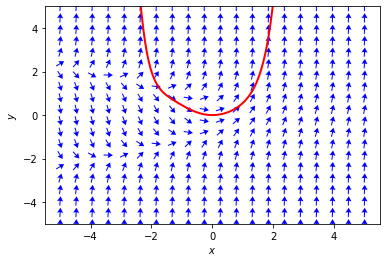

In [57]:
x = sympy.symbols('x')
y = sympy.Function('y')
f = y(x)**2 + x

ode_sol = sympy.dsolve(y(x).diff(x) - f, ics={y(0): 0}, n=9)
ode_sol

f_np = sympy.lambdify((x, y(x)), f, 'numpy')
x_np = np.linspace(-5, 5, 20)
y_np = np.linspace(-5, 5, 20)
X, Y = np.meshgrid(x_np, y_np)
# (1, f(x,y))
U = np.ones((20, 20))
V = f_np(X, Y)

# normalizacja
U1 = U / np.sqrt(U**2 + V**2)
V1 = V / np.sqrt(U**2 + V**2)

plt.quiver(X, Y, U1, V1, pivot='mid', headwidth=6, color='blue')

#wyświetlenie rozwiązania
x_vec = np.linspace(-3, 3, 100)
plt.plot(x_vec, sympy.lambdify(x, ode_sol.rhs.removeO())(x_vec), 'r', lw=2)
plt.ylim(-5, 5)

plt.xlabel("$x$")
plt.ylabel("$y$")
plt.show()

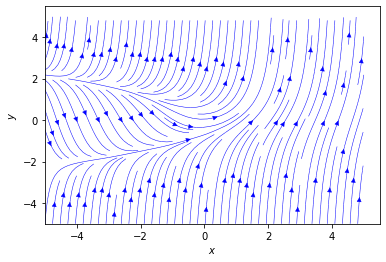

In [58]:
plt.streamplot(X, Y, U, V, density=1.5, color='blue', linewidth=0.5)
plt.xlabel('$x$')
plt.ylabel('$y$')
plt.show()

$$x'' - \mu(1 - x^2)x' + x = 0$$

Jako układ równań 1. rzędu:
$$x' = y, \quad y' = \mu(1-x^2)y - x.$$
Niech $\mu=1/3$.

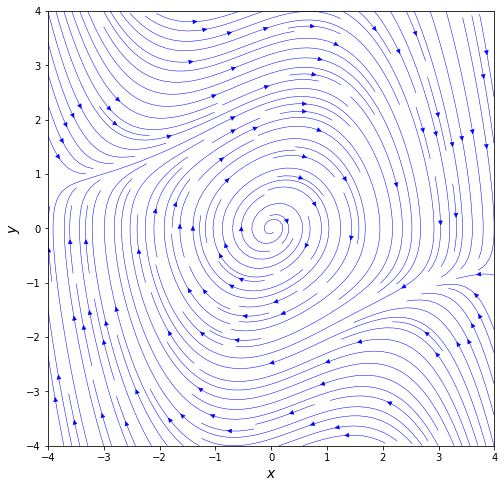

In [61]:
t = sympy.symbols('t')
x = sympy.Function('x')
y = sympy.Function('y')

_, axes = plt.subplots(figsize=(8,8))

fx = y(t)
fy = (1 - x(t)**2) * y(t) / 3 - x(t)

fx_np = sympy.lambdify((x(t), y(t)), fx, 'numpy')
fy_np = sympy.lambdify((x(t), y(t)), fy, 'numpy')
x_np = np.linspace(-4, 4, 20)
y_np = np.linspace(-4, 4, 20)
X, Y = np.meshgrid(x_np, y_np)
U = fx_np(X, Y)
V = fy_np(X, Y)

axes.streamplot(X, Y, U, V, density=2, color='blue', linewidth=0.5)
axes.set_xlabel('$x$', fontsize=14)
axes.set_ylabel('$y$', fontsize=14)
axes.set_xlim(-4, 4)
axes.set_ylim(-4, 4)

plt.show()

In [62]:
ode_sol = sympy.dsolve([x(t).diff(t) - fx, y(t).diff(t) - fy], ics={x(0): 1, y(0): 1})

ValueError: Couldn't solve for initial conditions

### Zadanie 2.
Na wykładzie i ćwiczeniach omawialiśmy układ równań Lotki-Volterry (czyli model drapieżnik-ofiara):
$$x' = ax - bxy, \quad y' = dxy - cy,$$
gdzie $x$ to liczność populacji ofiary, $y$ to liczność populacji drapieżnika. Stwórz pole kierunków i sprawdź, czy możliwe jest symboliczne wyznaczenie rozwiązania tego problemu dla następujących danych:
$$a = 0.4, \quad b = 0.002, \quad c = 0.7, \quad d = 0.001, \quad x(0) = 600, \quad y(0) = 400.$$

## Rozwiązywanie numeryczne
Pakiet `SciPy`, moduł `integrate`:

In [63]:
def fun1(x, y):
    "Prawa strona równania y'(x) = y(x)^2 + x"
    return y**2 + x

Istotna jest tutaj kolejność argumentów - najpierw zmienna niezależna, a potem zmienna zależna (może to być wektor).

In [64]:
ode_sol = integrate.solve_ivp(fun1, [0, 2], [0])

In [65]:
ode_sol

  message: 'Required step size is less than spacing between numbers.'
     nfev: 644
     njev: 0
      nlu: 0
      sol: None
   status: -1
  success: False
        t: array([0.00000000e+00, 1.00000000e-04, 1.10000000e-03, 1.11000000e-02,
       1.11100000e-01, 6.90152577e-01, 1.18420544e+00, 1.56681729e+00,
       1.71204134e+00, 1.85726538e+00, 1.89398310e+00, 1.93070082e+00,
       1.95115726e+00, 1.96836653e+00, 1.97421195e+00, 1.98005737e+00,
       1.98202062e+00, 1.98398388e+00, 1.98474786e+00, 1.98551184e+00,
       1.98575364e+00, 1.98599545e+00, 1.98609727e+00, 1.98619910e+00,
       1.98622777e+00, 1.98625643e+00, 1.98627044e+00, 1.98628445e+00,
       1.98628758e+00, 1.98629070e+00, 1.98629270e+00, 1.98629425e+00,
       1.98629483e+00, 1.98629540e+00, 1.98629556e+00, 1.98629571e+00,
       1.98629579e+00, 1.98629586e+00, 1.98629589e+00, 1.98629591e+00,
       1.98629592e+00, 1.98629593e+00, 1.98629593e+00, 1.98629593e+00,
       1.98629593e+00, 1.98629593e+00, 1.98629593e

In [66]:
print(ode_sol.t)

[0.00000000e+00 1.00000000e-04 1.10000000e-03 1.11000000e-02
 1.11100000e-01 6.90152577e-01 1.18420544e+00 1.56681729e+00
 1.71204134e+00 1.85726538e+00 1.89398310e+00 1.93070082e+00
 1.95115726e+00 1.96836653e+00 1.97421195e+00 1.98005737e+00
 1.98202062e+00 1.98398388e+00 1.98474786e+00 1.98551184e+00
 1.98575364e+00 1.98599545e+00 1.98609727e+00 1.98619910e+00
 1.98622777e+00 1.98625643e+00 1.98627044e+00 1.98628445e+00
 1.98628758e+00 1.98629070e+00 1.98629270e+00 1.98629425e+00
 1.98629483e+00 1.98629540e+00 1.98629556e+00 1.98629571e+00
 1.98629579e+00 1.98629586e+00 1.98629589e+00 1.98629591e+00
 1.98629592e+00 1.98629593e+00 1.98629593e+00 1.98629593e+00
 1.98629593e+00 1.98629593e+00 1.98629593e+00 1.98629593e+00
 1.98629593e+00 1.98629593e+00 1.98629593e+00 1.98629593e+00
 1.98629593e+00 1.98629593e+00 1.98629593e+00 1.98629593e+00
 1.98629593e+00 1.98629593e+00 1.98629593e+00 1.98629593e+00
 1.98629593e+00 1.98629593e+00 1.98629593e+00 1.98629593e+00
 1.98629593e+00 1.986295

* `solve_ivp` automatycznie wybiera punkty, w których daje rozwiązanie
* `ode_sol.y` to wektor

In [68]:
x_p = np.linspace(0, 1.9, 200)
ode_sol_p = integrate.solve_ivp(fun1, [0, 1.9], [0], t_eval=x_p)

In [69]:
x_m = np.linspace(0, -5, 200)
ode_sol_m = integrate.solve_ivp(fun1, [0, -5], [0], t_eval=x_m)

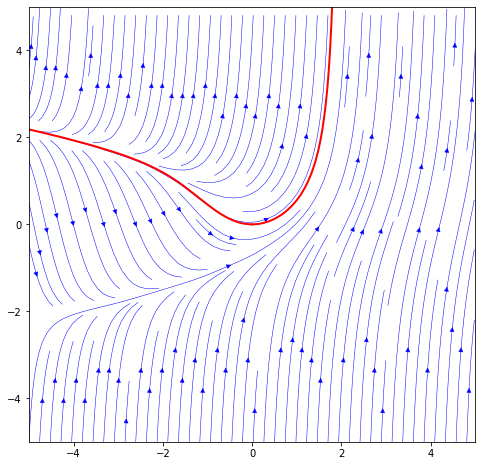

In [85]:
_, axes = plt.subplots(figsize=(8,8))

x_np = np.linspace(-5, 5, 20)
y_np = np.linspace(-5, 5, 20)
X, Y = np.meshgrid(x_np, y_np)
U1 = np.ones((20, 20))
V1 = Y**2 + X

axes.streamplot(X, Y, U1, V1, density=1.5, color='blue', linewidth=0.5)
axes.plot(x_p, ode_sol_p.y[0], 'r', lw=2)
axes.plot(x_m, ode_sol_m.y[0], 'r', lw=2)
axes.set_xlim(-5, 5)
axes.set_ylim(-5, 5)
plt.show()

### Zadanie 3.
Rozwiąż numerycznie układ równań Lotki-Volterry z Zadanie 2, następnie stwórz wykres rozwiązań (zależności $x(t)$ i $y(t)$), a także nanieś na pole kierunków trajektorię rozwiązania.

Rozważmy na koniec zmodyfikowany model drapieżnik-ofiara: \begin{align*}
x' &= x\left(a - \frac{b}{1 + bhx}y - \frac{a}{K}x\right), &\quad & x(0) = x_0, \\
y' &= y\left(-c + \frac{db}{1+bhx}x\right), &\quad & y(0) = y_0.
\end{align*}

In [86]:
def fun2(t, z, a, b, K, c, d, h):
    "Prawa strona zmodyfikowanego układu równań Lotki-Volterry"
    x, y = z
    z0 = x * (a - b * y / (1 + b * h * x) - a * x / K)
    z1 = y * (- c + d * b * x / (1 + b * h *x))
    return [z0, z1]

In [91]:
a, b, K, c, d, h = 0.5, 0.005, 200, 0.1, 0.5, 0.1
xy0 = [204, 406]
t = np.linspace(0, 150, 1000)
ode_sol = integrate.solve_ivp(fun2, [0, 150], xy0, args=(a, b, K, c, d, h), dense_output=True)

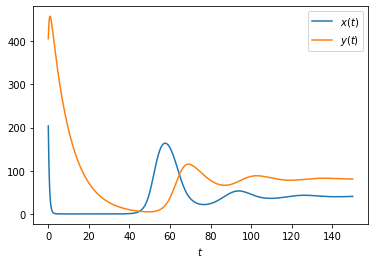

In [92]:
plt.plot(t, ode_sol.sol(t).T)
plt.xlabel('$t$')
plt.legend(['$x(t)$', '$y(t)$'])
plt.show()

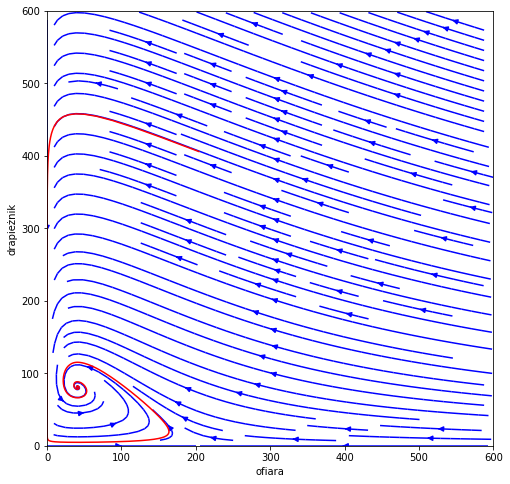

In [93]:
_, axes = plt.subplots(figsize=(8,8))

X, Y = np.meshgrid(np.linspace(0, 600, 40), np.linspace(0, 600, 40))
U, V = fun2(_, (X, Y), a, b, K, c, d, h)

axes.streamplot(X, Y, U, V, density=1.5, color='blue')
axes.plot(ode_sol.sol(t)[0], ode_sol.sol(t)[1], 'r')
axes.set_xlabel('ofiara')
axes.set_ylabel('drapieżnik')
axes.set_xlim(0, 600)
axes.set_ylim(0, 600)
plt.show()